In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('../data/garmin/sleep.csv', sep=',')

# Trim columns
df = df.loc[:, ['User First Name', 'Calendar Date (Local)', 'Start Time (Local)', 'End Time (Local)', 'Duration (s)', 'Rem Sleep Duration (s)', 'Deep Sleep Duration (s)', 'Light Sleep Duration (s)', 'Source']]

df

,User First Name,Calendar Date (Local),Start Time (Local),End Time (Local),Duration (s),Rem Sleep Duration (s),Deep Sleep Duration (s),Light Sleep Duration (s),Source
0,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,8400,3000,16560,device
1,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,8400,3000,16560,device
2,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,8400,3000,16560,device
3,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,8400,3000,16560,device
4,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,8400,3000,16560,device
...,...,...,...,...,...,...,...,...,...
3791,P14,2024-01-08,2024-01-08T00:01:00,2024-01-08T07:34:00,27180,4140,6600,16380,device
3792,P14,2024-01-08,2024-01-08T00:01:00,2024-01-08T07:34:00,27180,4140,6600,16380,device
3793,P14,2024-01-08,2024-01-08T00:01:00,2024-01-08T07:34:00,27180,4140,6600,16380,device
3794,P14,2024-01-08,2024-01-08T00:01:00,2024-01-08T07:34:00,27180,4140,6600,16380,device


In [3]:
# Select records for one user
p_df = df[df['User First Name'] == 'P11']
p_df

,User First Name,Calendar Date (Local),Start Time (Local),End Time (Local),Duration (s),Rem Sleep Duration (s),Deep Sleep Duration (s),Light Sleep Duration (s),Source
677,P11,2023-12-27,2023-12-27T23:04:00,2023-12-27T23:05:00,60,0,60,0,server
678,P11,2023-12-29,2023-12-29T01:30:00,2023-12-29T08:50:00,26400,5220,6660,11640,device
679,P11,2023-12-29,2023-12-29T01:30:00,2023-12-29T08:50:00,26400,5220,6660,11640,device
680,P11,2023-12-29,2023-12-29T01:30:00,2023-12-29T08:50:00,26400,5220,6660,11640,device
681,P11,2023-12-29,2023-12-29T01:30:00,2023-12-29T08:50:00,26400,5220,6660,11640,device
...,...,...,...,...,...,...,...,...,...
1284,P11,2024-01-07,2024-01-07T15:00:00,2024-01-08T08:43:00,63780,0,15660,8100,server
1285,P11,2024-01-07,2024-01-07T15:00:00,2024-01-08T08:43:00,63780,0,15660,8100,server
1286,P11,2024-01-07,2024-01-07T15:00:00,2024-01-08T08:43:00,63780,0,15660,8100,server
1287,P11,2024-01-07,2024-01-07T15:00:00,2024-01-08T08:43:00,63780,0,15660,8100,server


In [4]:
# Load glucose dataset
glucose_df = pd.read_csv('../data/P11/supersapiens/merged.csv', sep=';')

# Convert timestamp
glucose_df['recorded_timestamp'] = pd.to_datetime(glucose_df['recorded_timestamp'])

glucose_df

,glucose,recorded_timestamp
0,106,2023-12-23 00:00:59
1,104,2023-12-23 00:02:00
2,102,2023-12-23 00:03:01
3,101,2023-12-23 00:04:00
4,101,2023-12-23 00:05:01
...,...,...
17630,98,2023-12-28 23:55:32
17631,97,2023-12-28 23:56:33
17632,97,2023-12-28 23:57:33
17633,96,2023-12-28 23:58:35


In [5]:
# Group glucose by day
glucose_mean_per_day = pd.DataFrame(glucose_df.groupby(glucose_df['recorded_timestamp'].dt.date)['glucose'].mean())

# Change index data type
glucose_mean_per_day.index = pd.to_datetime(glucose_mean_per_day.index)

glucose_mean_per_day

,glucose
recorded_timestamp,
2023-12-21,99.417051
2023-12-22,102.465241
2023-12-23,100.516803
2023-12-24,98.061563
2023-12-25,93.704066
2023-12-26,99.168745
2023-12-27,99.998476
2023-12-28,96.941217
2023-12-29,94.850168


# Aggregate average glucose level of the day with sleep data

In [6]:
# Convert column type
glucose_mean_per_day.index = pd.to_datetime(glucose_mean_per_day.index)
p_df['Calendar Date (Local)'] = pd.to_datetime(p_df['Calendar Date (Local)'])

# Join Garmin Dataset with Glucose Data
p_df_merged = pd.merge(p_df, glucose_mean_per_day, left_on='Calendar Date (Local)', how='inner', right_index=True)

p_df_merged

C:\Users\bjoer\AppData\Local\Temp\ipykernel_1788\165701922.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_df['Calendar Date (Local)'] = pd.to_datetime(p_df['Calendar Date (Local)'])


,User First Name,Calendar Date (Local),Start Time (Local),End Time (Local),Duration (s),Rem Sleep Duration (s),Deep Sleep Duration (s),Light Sleep Duration (s),Source,glucose
677,P11,2023-12-27,2023-12-27T23:04:00,2023-12-27T23:05:00,60,0,60,0,server,99.998476
678,P11,2023-12-29,2023-12-29T01:30:00,2023-12-29T08:50:00,26400,5220,6660,11640,device,94.850168
679,P11,2023-12-29,2023-12-29T01:30:00,2023-12-29T08:50:00,26400,5220,6660,11640,device,94.850168
680,P11,2023-12-29,2023-12-29T01:30:00,2023-12-29T08:50:00,26400,5220,6660,11640,device,94.850168
681,P11,2023-12-29,2023-12-29T01:30:00,2023-12-29T08:50:00,26400,5220,6660,11640,device,94.850168
...,...,...,...,...,...,...,...,...,...,...
934,P11,2024-01-04,2024-01-04T19:47:00,2024-01-05T09:24:00,49020,0,22020,11400,server,106.852094
935,P11,2024-01-04,2024-01-04T19:47:00,2024-01-05T09:24:00,49020,0,22020,11400,server,106.852094
936,P11,2024-01-04,2024-01-04T19:47:00,2024-01-05T09:24:00,49020,0,22020,11400,server,106.852094
937,P11,2024-01-04,2024-01-04T19:47:00,2024-01-05T09:24:00,49020,0,22020,11400,server,106.852094


In [7]:
# Trim columns
#sleep_glucose_df = p_df_merged.loc[:, ['User First Name', 'Calendar Date (Local)', 'Start Time (Local)', 'End Time (Local)', 'Duration (s)', 'Rem Sleep Duration (s)', 'Deep Sleep Duration (s)', 'Light Sleep Duration (s)', 'Source']]
sleep_glucose_df = p_df_merged.drop_duplicates(ignore_index=True)

sleep_glucose_df

,User First Name,Calendar Date (Local),Start Time (Local),End Time (Local),Duration (s),Rem Sleep Duration (s),Deep Sleep Duration (s),Light Sleep Duration (s),Source,glucose
0,P11,2023-12-27,2023-12-27T23:04:00,2023-12-27T23:05:00,60,0,60,0,server,99.998476
1,P11,2023-12-29,2023-12-29T01:30:00,2023-12-29T08:50:00,26400,5220,6660,11640,device,94.850168
2,P11,2023-12-30,2023-12-30T02:32:00,2023-12-30T08:17:00,20700,2940,3960,10680,device,102.743633
3,P11,2023-12-31,2023-12-31T02:51:00,2023-12-31T07:42:00,17460,3960,3360,9120,device,101.346390
4,P11,2023-12-31,2023-12-31T15:00:00,2024-01-01T00:00:00,32400,0,0,1380,server,101.346390
5,P11,2024-01-01,2024-01-01T15:00:00,2024-01-02T15:01:00,86460,0,74400,7500,server,104.948331
6,P11,2024-01-03,2024-01-03T01:45:00,2024-01-03T08:01:00,22560,4020,6240,10380,device,109.498243
7,P11,2024-01-04,2024-01-04T00:49:00,2024-01-04T08:05:00,26160,7200,9720,27480,device,106.852094
8,P11,2024-01-04,2024-01-04T03:43:00,2024-01-04T08:05:00,15720,7200,2880,18840,device,106.852094
9,P11,2024-01-04,2024-01-04T05:42:00,2024-01-04T08:05:00,8580,4080,0,13080,device,106.852094


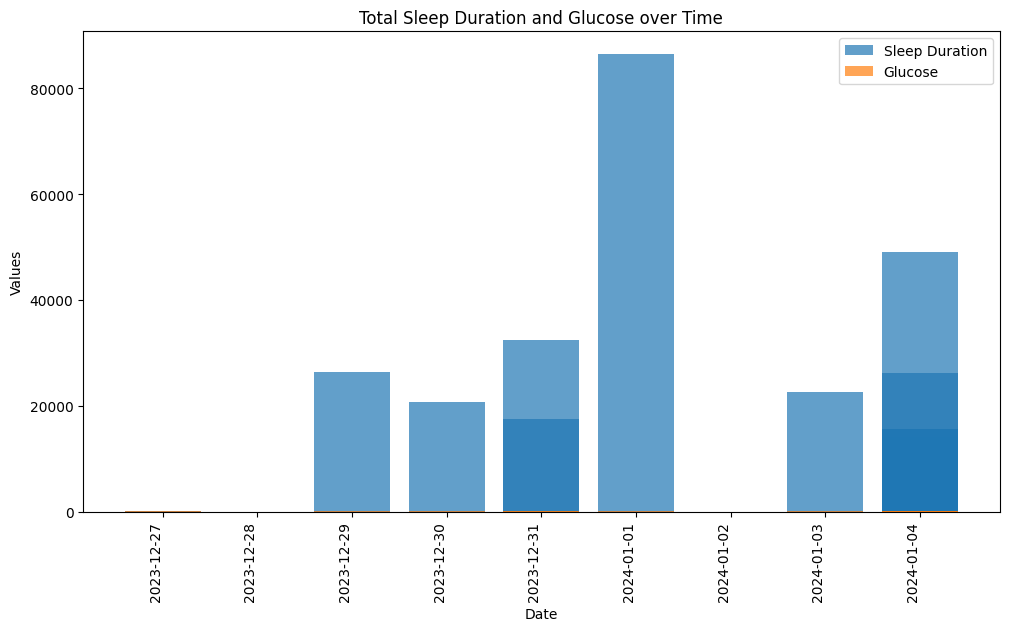

In [8]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sleep_glucose_df['Calendar Date (Local)'], sleep_glucose_df['Duration (s)'], label='Sleep Duration', alpha=0.7)
plt.bar(sleep_glucose_df['Calendar Date (Local)'], sleep_glucose_df['glucose'], label='Glucose', alpha=0.7)

# Format the x-axis labels
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Total Sleep Duration and Glucose over Time')

# Display legend
plt.legend()

# Show the plot
plt.show()

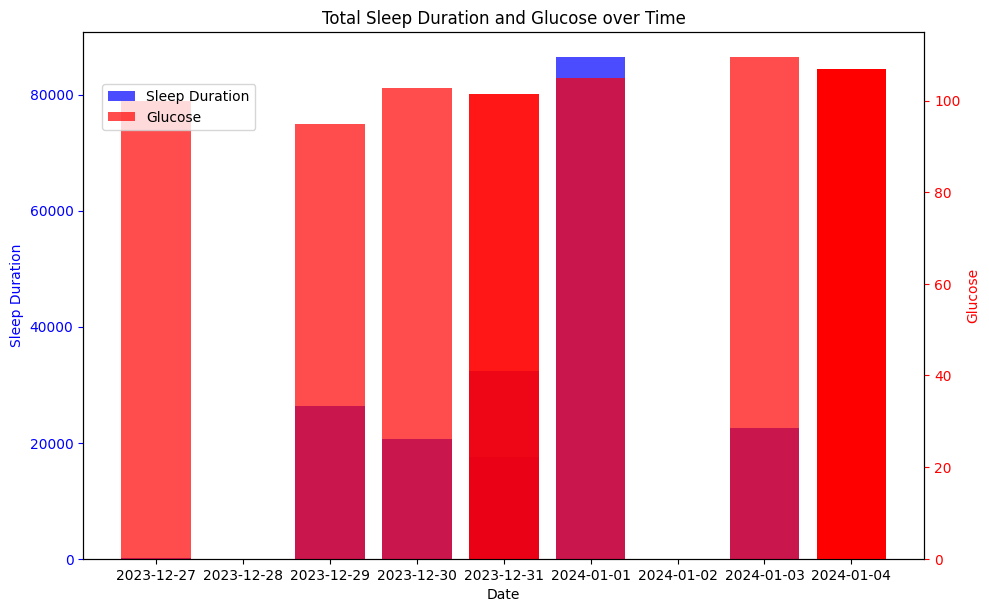

In [9]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot 'sleepDuration' on the primary y-axis
ax1.bar(sleep_glucose_df['Calendar Date (Local)'], sleep_glucose_df['Duration (s)'], label='Sleep Duration', alpha=0.7, color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sleep Duration', color='b')
ax1.tick_params('y', colors='b')

# Create a secondary y-axis for 'glucose'
ax2 = ax1.twinx()
ax2.bar(sleep_glucose_df['Calendar Date (Local)'], sleep_glucose_df['glucose'], label='Glucose', alpha=0.7, color='r')
ax2.set_ylabel('Glucose', color='r')
ax2.tick_params('y', colors='r')

# Format the x-axis labels
plt.xticks(rotation=45, ha='right')
#plt.xticks(df['Calendar Date (Local)'], rotation=90, ha='right', fontsize=8)
plt.tight_layout()

# Set title
plt.title('Total Sleep Duration and Glucose over Time')

# Display legend
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.show()

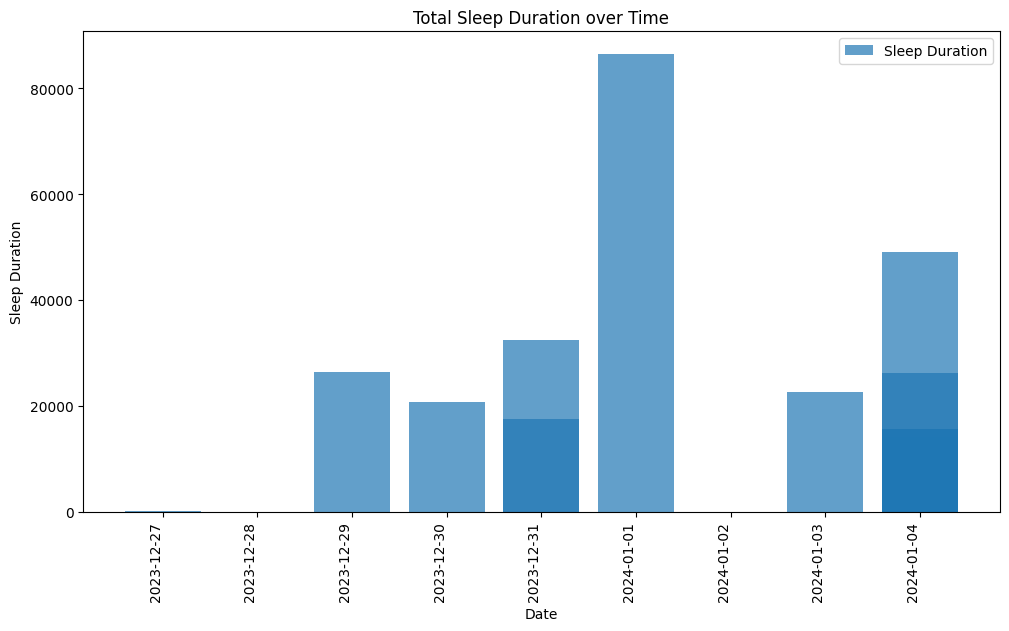

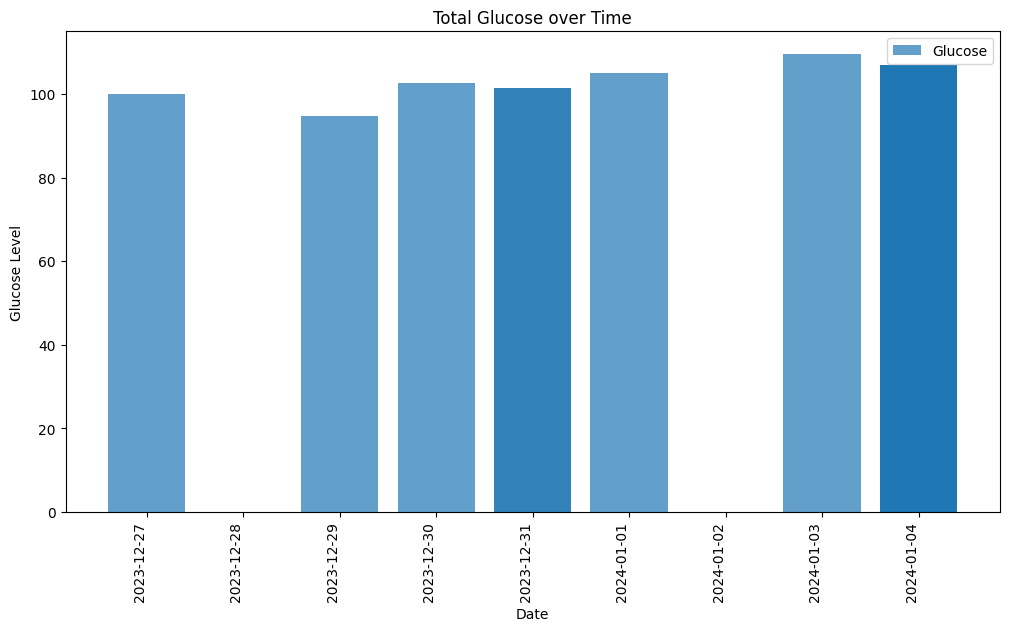

In [10]:
# Create a bar chart
plt.figure(figsize=(10, 6))

plt.bar(sleep_glucose_df['Calendar Date (Local)'], sleep_glucose_df['Duration (s)'], label='Sleep Duration', alpha=0.7)

# Format the x-axis labels
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Sleep Duration')
plt.title('Total Sleep Duration over Time')

# Display legend
plt.legend()

# Show the plot
plt.show()

# Create a bar chart
plt.figure(figsize=(10, 6))

# Create a bar chart
plt.bar(sleep_glucose_df['Calendar Date (Local)'], sleep_glucose_df['glucose'], label='Glucose', alpha=0.7)

# Format the x-axis labels
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Glucose Level')
plt.title('Total Glucose over Time')

# Display legend
plt.legend()

# Show the plot
plt.show()

# Correlation between Sleep Duration and Glucose Level

Correlation Coefficient: -0.07510519821225699


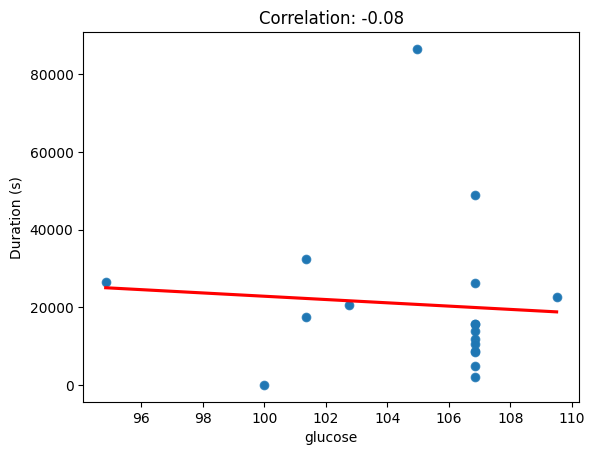

In [11]:
column1 = sleep_glucose_df['glucose']
column2 = sleep_glucose_df['Duration (s)']

# Calculate the correlation coefficient
correlation_coefficient = column1.corr(column2)

print(f'Correlation Coefficient: {correlation_coefficient}')

# Create a scatter plot
sns.scatterplot(x=column1, y=column2)

# Add a regression line and correlation coefficient
sns.regplot(x=column1, y=column2, ci=None, line_kws={'color': 'red'})
plt.title(f'Correlation: {column1.corr(column2):.2f}')

# Display the plot
plt.show()

As the correlation coefficient is close to zero, it indicates that there is almost no linear relationship between the two columns. 

Correlation Coefficient: 0.008524317684081099


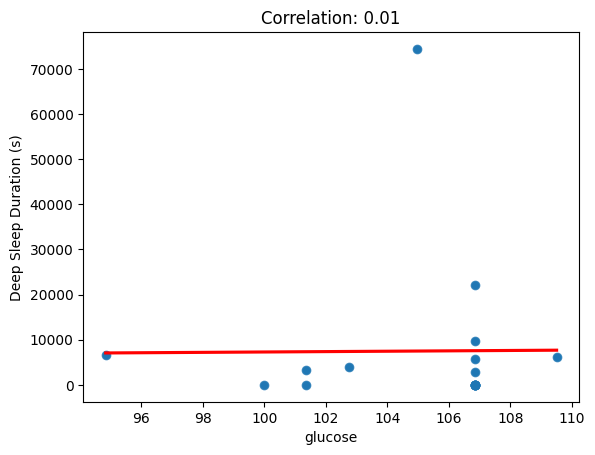

In [12]:
column1 = sleep_glucose_df['glucose']
column2 = sleep_glucose_df['Deep Sleep Duration (s)']

# Calculate the correlation coefficient
correlation_coefficient = column1.corr(column2)

print(f'Correlation Coefficient: {correlation_coefficient}')

# Create a scatter plot
sns.scatterplot(x=column1, y=column2)

# Add a regression line and correlation coefficient
sns.regplot(x=column1, y=column2, ci=None, line_kws={'color': 'red'})
plt.title(f'Correlation: {column1.corr(column2):.2f}')

# Display the plot
plt.show()

A correlation coefficient of approximately -0.43 indicates a moderate negative correlation between the two variables. The negative sign suggests that as one variable increases, the other tends to decrease, and vice versa. The magnitude of -0.43 suggests that the relationship is stronger than a weak correlation but not extremely strong.

Correlation Coefficient: -0.08878599406172011


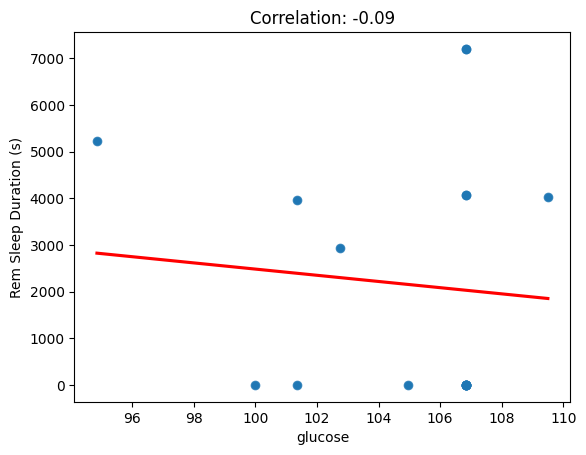

In [13]:
column1 = sleep_glucose_df['glucose']
column2 = sleep_glucose_df['Rem Sleep Duration (s)']

# Calculate the correlation coefficient
correlation_coefficient = column1.corr(column2)

print(f'Correlation Coefficient: {correlation_coefficient}')

# Create a scatter plot
sns.scatterplot(x=column1, y=column2)

# Add a regression line and correlation coefficient
sns.regplot(x=column1, y=column2, ci=None, line_kws={'color': 'red'})
plt.title(f'Correlation: {column1.corr(column2):.2f}')

# Display the plot
plt.show()

Correlation Coefficient: -0.003438664102713951


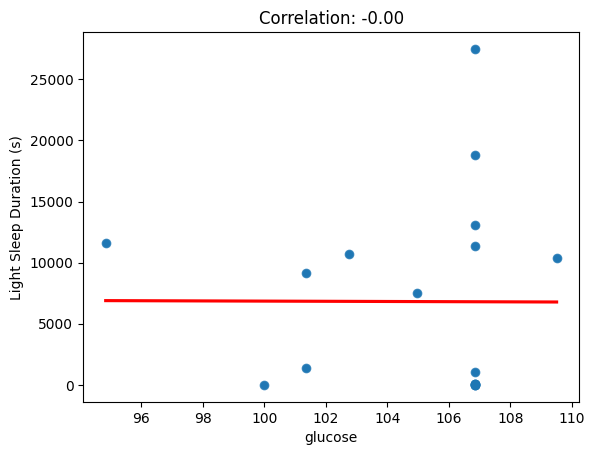

In [14]:
column1 = sleep_glucose_df['glucose']
column2 = sleep_glucose_df['Light Sleep Duration (s)']

# Calculate the correlation coefficient
correlation_coefficient = column1.corr(column2)

print(f'Correlation Coefficient: {correlation_coefficient}')

# Create a scatter plot
sns.scatterplot(x=column1, y=column2)

# Add a regression line and correlation coefficient
sns.regplot(x=column1, y=column2, ci=None, line_kws={'color': 'red'})
plt.title(f'Correlation: {column1.corr(column2):.2f}')

# Display the plot
plt.show()